# Car Prices 

# Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:   
Which variables are significant in predicting the price of a car    
How well those variables describe the price of a car

In [76]:
# Importing the libraries
import numpy as np
import pandas as pd

In [5]:
# Importing OS library
import os
os.chdir('D:')

In [6]:
# Reading the csv file
df=pd.read_csv('CarPrice_Assignment.csv')

In [7]:
# Using shape function 
df.shape

(205, 26)

This datset contains data of 205 cars and 26 variables defining the car.

In [8]:
# Using head function
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


We can see the table contents of first 5 rows

**DATA DICTONARY**					
						
	Car_ID-Unique id of each observation (Interger)
    
	Symboling -Its assigned insurance risk rating +3 risky and -3 safe	 
    
	carCompany-Name of car company (Categorical)
    
	fueltype-Car fuel type i.e gas or diesel (Categorical)
    
	aspiration-Aspiration used in a car (Categorical)		
    
	doornumber-Number of doors in a car (Categorical)	
    
	carbody-body of car (Categorical)		
    
	drivewheel-type of drive wheel (Categorical)	
    
	enginelocation-Location of car engine (Categorical)
    
	wheelbase-Weelbase of car (Numeric)	
    
	carlength-Length of car (Numeric)
    
	carwidth-Width of car (Numeric)
    
	carheight-height of car (Numeric)
    
	curbweight-The weight of a car without occupants or baggage. (Numeric)
    
	enginetype-Type of engine. (Categorical)
    
	cylindernumber-cylinder placed in the car (Categorical)
    
	enginesize-Size of car (Numeric)
    
	fuelsystem-Fuel system of car (Categorical)
    
	boreratio-Boreratio of car (Numeric)
    
    stroke-Stroke or volume inside the engine (Numeric)
    
	compressionratio-compression ratio of car (Numeric)	
    
	horsepower-Horsepower (Numeric)	
    
	peakrpm-car peak rpm (Numeric)
    
	citympg-Mileage in city (Numeric)
    
	highwaympg-Mileage on highway (Numeric)
    
	price-Price of car (Numeric)(Dependent variable)	


**Data Cleaning and Manipulation**

In [9]:
# Checking the null values 
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**No null** values are present in the dataset.

**Creating new columns**

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'.

We extract the 'car compny' and 'car model' from the carname column.

In [10]:
df[['CarName']].head()

,CarName
0,alfa-romero giulia
1,alfa-romero stelvio
2,alfa-romero Quadrifoglio
3,audi 100 ls
4,audi 100ls


In [11]:
new=df['CarName'].str.split(pat=' ',n=1,expand=True)

df['CarCompany']=new[0]

df['CarModel']=new[1]
  

In [12]:
df[['CarCompany']].head()

,CarCompany
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi


In [13]:
df[['CarModel']].head()

,CarModel
0,giulia
1,stelvio
2,Quadrifoglio
3,100 ls
4,100ls


**Car dimension**

we create a new column name 'cardimension' which can give the overview of the volume of the car.

In [14]:
df['cardimensions']=df['carlength']*df['carheight']*df['carwidth']

**Anamoly in the 'carcompany' column**

In [15]:
df['CarCompany'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
toyouta         1
mercury         1
Nissan          1
porcshce        1
vokswagen       1
Name: CarCompany, dtype: int64


here , we can see that there are **spelling mistakes** in the column such as:-

-toyouta

-Nissan

-maxda

-vw

-vokswagen

-porschce

We have to rectify this error

In [16]:
df['CarCompany']=df['CarCompany'].apply( lambda x:x.replace('toyouta','toyota'))

In [17]:
df['CarCompany']=df['CarCompany'].apply( lambda x:x.replace('Nissan','nissan'))

In [18]:
df['CarCompany']=df['CarCompany'].apply( lambda x:x.replace('maxda','mazda'))

In [19]:
df['CarCompany']=df['CarCompany'].apply( lambda x:x.replace('vw','volkswagen'))

In [20]:
df['CarCompany']=df['CarCompany'].apply( lambda x:x.replace('vokswagen','volkswagen'))

In [21]:
df['CarCompany']=df['CarCompany'].apply( lambda x:x.replace('porcshce','porsche'))

We can now check the **corrected values**

In [22]:
df['CarCompany'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
mercury         1
Name: CarCompany, dtype: int64

In [23]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel,cardimensions
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,528019.904
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,528019.904
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,587592.640
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls,634816.956
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,audi,100ls,636734.832


In [24]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cardimensions
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,618719.288873
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,79463.195262
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,452643.156000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,566490.600000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,601385.700000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,666250.200000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,846007.659000


Here, we can say that there are no further anomalies in the data by comparing the maximum and minimum value with the mean.

In [25]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarCompany', 'CarModel', 'cardimensions'],
      dtype='object')

**Dropping the unnecessary columns from the dataset**

We have dropped the following columns beacause there is no need of them in the analysis
'car_ID','CarName','carlength', 'carwidth', 'carheight'

In [26]:
df.drop(['car_ID','CarName','carlength', 'carwidth', 'carheight'], axis = 1, inplace = True) 
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,CarModel,cardimensions
0,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia,528019.904
1,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio,528019.904
2,1,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio,587592.640
3,2,gas,std,four,sedan,fwd,front,99.8,2337,ohc,...,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls,634816.956
4,2,gas,std,four,sedan,4wd,front,99.4,2824,ohc,...,3.40,8.0,115,5500,18,22,17450.0,audi,100ls,636734.832


In [27]:
#importing libraries for the visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis

**1. Price** 

In [28]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

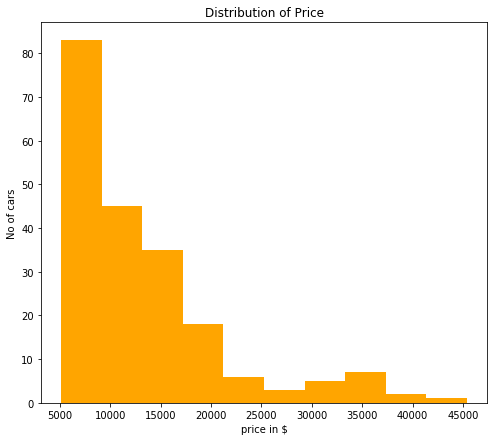

In [29]:
f,ax=plt.subplots(figsize=(8,7))
df['price'].plot(kind='hist',color='orange')
plt.title('Distribution of Price')
plt.xlabel('price in $')
plt.ylabel('No of cars')
plt.show()

Here, we got the **mean** price of the car as **13276**$

But as we can see in the graph **mean** does not gives the full story because the **max no of cars** sold are in the price range of **5000-15000**$.

Therefore, mean is not correct parameter to judge the car prices prevailing in the states.

From the price range we can see that **America is price sensitive market**.



**2.Fueltype**

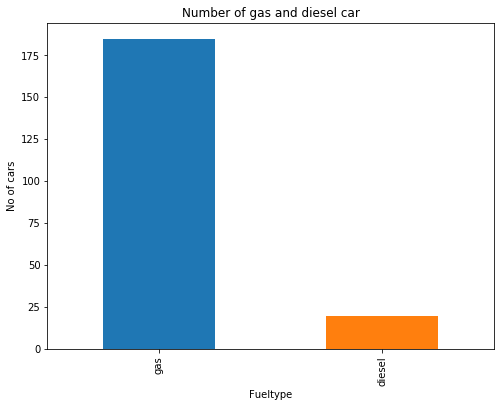

In [30]:
f,ax=plt.subplots(figsize=(8,6))
df['fueltype'].value_counts().plot('bar')
plt.title('Number of gas and diesel car')
plt.xlabel('Fueltype')
plt.ylabel('No of cars')
plt.show()


From the graph it is completly clear that Americans prefer **Gas car** over the diesel car.

**3.CarCompany**

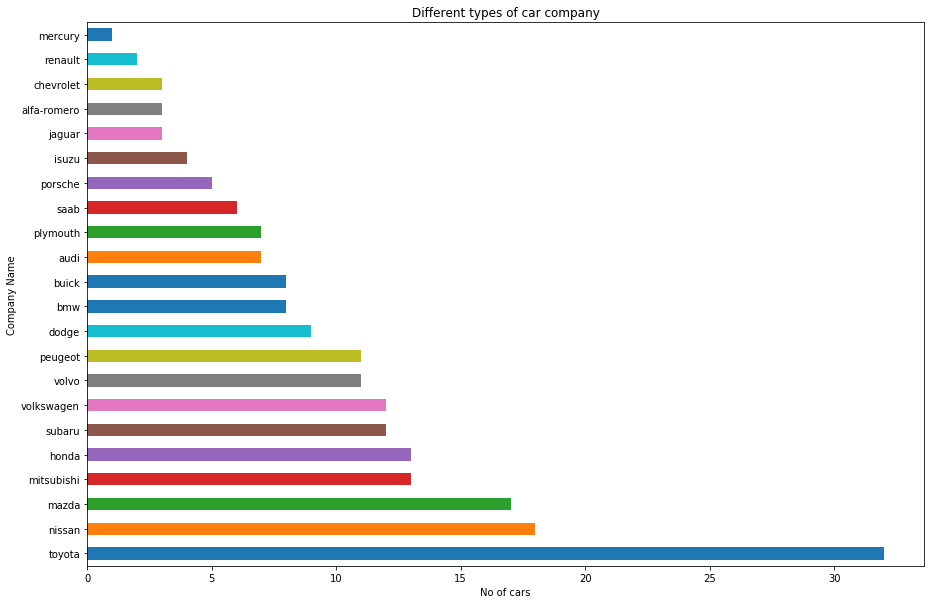

In [31]:
f,ax=plt.subplots(figsize=(15,10))
df['CarCompany'].value_counts().plot('barh')
plt.title('Different types of car company')
plt.xlabel('No of cars')
plt.ylabel('Company Name')
plt.show()

**Toyota** is the largest CarCompany in the America followed by **nissan,mazda,mitsubhushi,honda,volkswagen,subaru**.


**4.Citymileage & Highwaymileage**

In [32]:
df['citympg'].describe()


count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: citympg, dtype: float64

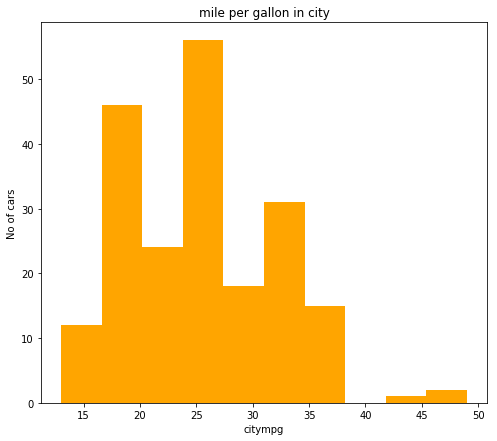

In [33]:
f,ax=plt.subplots(figsize=(8,7))
df['citympg'].plot(kind='hist',color='orange')
plt.title('mile per gallon in city')
plt.xlabel('citympg')
plt.ylabel('No of cars')
plt.show()


In [34]:
df['highwaympg'].describe()

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highwaympg, dtype: float64

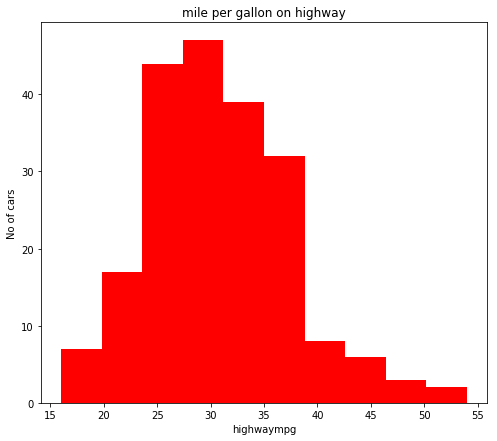

In [35]:
f,ax=plt.subplots(figsize=(8,7))
df['highwaympg'].plot(kind='hist',color='red')
plt.title('mile per gallon on highway')
plt.xlabel('highwaympg')
plt.ylabel('No of cars')
plt.show()

Average mileage for car in **city** is **25**mpg.

Average mileage for car on **highway** is **30**mpg.

**4.Horsepower**

In [36]:
df['horsepower'].describe()

count    205.000000
mean     104.117073
std       39.544167
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

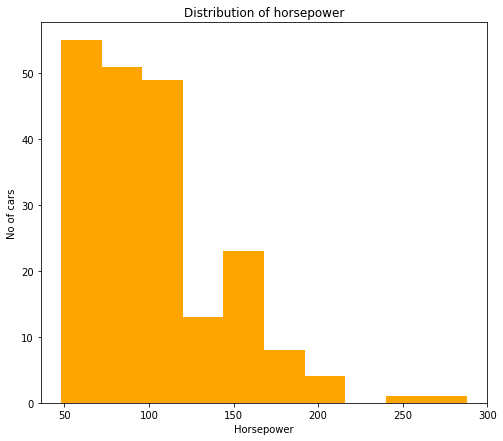

In [37]:
f,ax=plt.subplots(figsize=(8,7))
df['horsepower'].plot(kind='hist',color='orange')
plt.xlabel('Horsepower')
plt.ylabel('No of cars')
plt.title('Distribution of horsepower') 
plt.show()

From the graph it is clear that people in America prefer car having **Horsepower** ranging from **50-125** horsepower.

**5.CarBody**

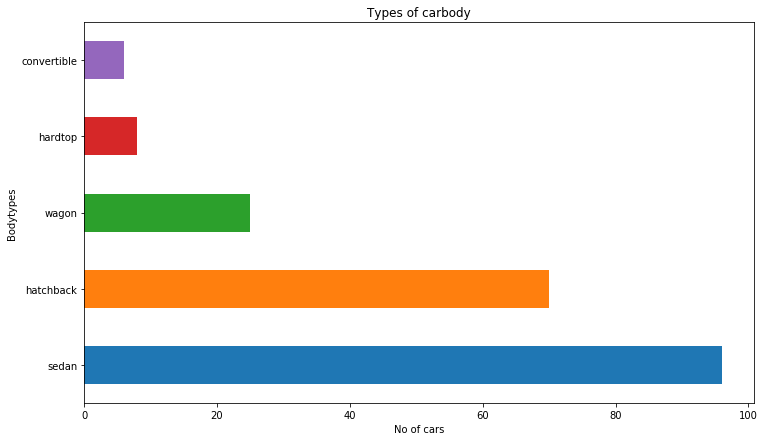

In [38]:
f,ax=plt.subplots(figsize=(12,7))
df['carbody'].value_counts().plot('barh')
plt.title('Types of carbody')
plt.ylabel('Bodytypes')
plt.xlabel('No of cars')
plt.show()

From the graph it is evident that the most people in America prefer **Sedan** cars  followed by **Hatchback**.

**6.Doornumber**

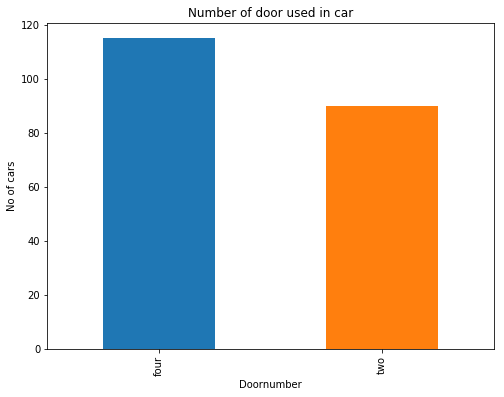

In [39]:
f,ax=plt.subplots(figsize=(8,6))
df['doornumber'].value_counts().plot('bar')
plt.title('Number of door used in car')
plt.xlabel('Doornumber')
plt.ylabel('No of cars')
plt.show()


Here, we can see that doornumber does not have any significane .

People in America tend to buy cars having both 2 and 4 gates.

# Bivariate Analysis

**1.Price wrt CarCompany**

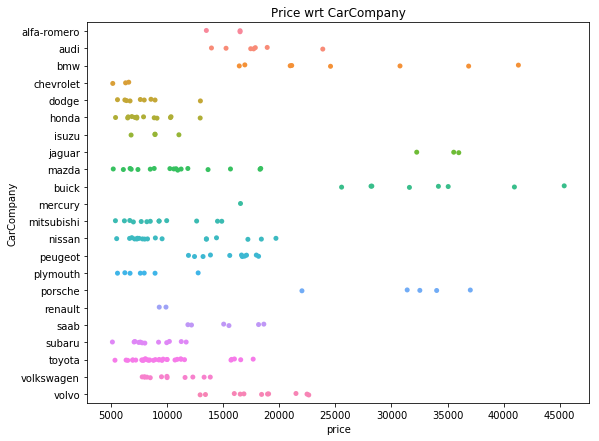

In [40]:
f,ax=plt.subplots(figsize=(9,7))
sns.stripplot(data=df,x='price',y='CarCompany',jitter=0.05)
plt.title('Price wrt CarCompany')
plt.show()

Here we can see the price range in which CarCompany in america operates.

Mainly car price is divided into three parts ie; 

1.Budget

2.Midrange

3.Flagship

From the graph, 

**Budget** CarCompanys includes **volkswagen,toyota,subaru,plymouth,nissan,mitsubhushi,mazda,isuzu,honda,dodge,chervolet**.

**Midarnge** CarCompanys includes **volvo,saab,renault,peugeot,nissan,mercury,mazda,alfa-romero,bmw,audi**.

**Flagship** CarCompany includes **porsche,buick,jaguar,bmw,audi**.

Since, **America is price Sensitive** market we can see that **majority of company operate in the budget and midrange segment** as compared to the flagship segment.

**2.Price wrt Fueltype**

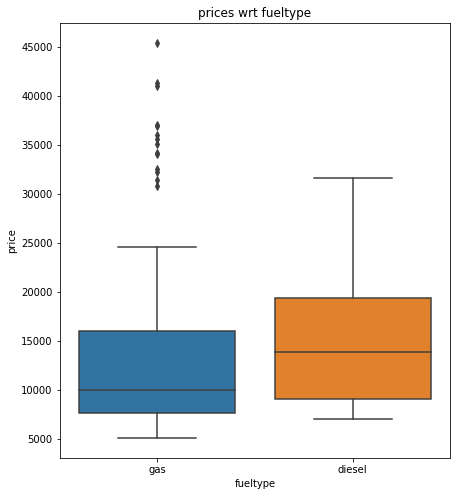

In [41]:
f,ax=plt.subplots(figsize=(7,8))
sns.boxplot(data=df,x='fueltype',y='price')
plt.title('prices wrt fueltype')
plt.show()

**Median price** for **Gas** car is around **10000**$. 

**Median price** for **Diesel** car is around **15000**$.

There are some **Gas car** that have **significant higher price** beacuse **Flagship car** prefers **Gas** as fuel.

Other than that the **price range** for **Diesel car is high** than that of the **Gas car**.

**3.Price wrt bodytype**

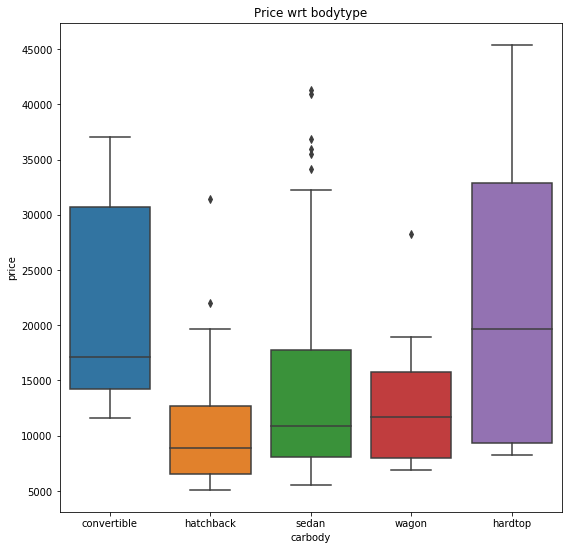

In [42]:
f,ax=plt.subplots(figsize=(9,9))
sns.boxplot(data=df,x='carbody',y='price')
plt.title('Price wrt bodytype')
plt.show()

The **Median price** for the follwing bodytypes are as follows 

1.Convertible-**approx. 17500**$ (preferred by **Midrange** cars)

2.Hatchback-**approx. 9000**$    (preferred by **Budget** cars)

3.Sedan-**approx. 11000**$       (preferred by **Budget and some Flagships** cars)

4.Wagon-**approx. 12000**$       (preferred by **Budget** cars)

5.Hardtop-**approx. 18000**$    (preferred by **Midrange and Budget** cars)

**4.Horsepower vs price**

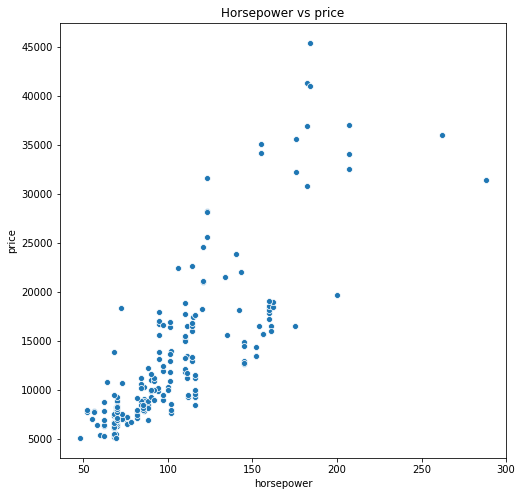

In [43]:
f,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df,x='horsepower',y='price')
plt.title('Horsepower vs price')
plt.show()

From the graph it is clearly evident that **As Horsepower of the car increases the price of the car increases**.

It follows **Positive coorelation**.

**5.Horsepower vs mileage**

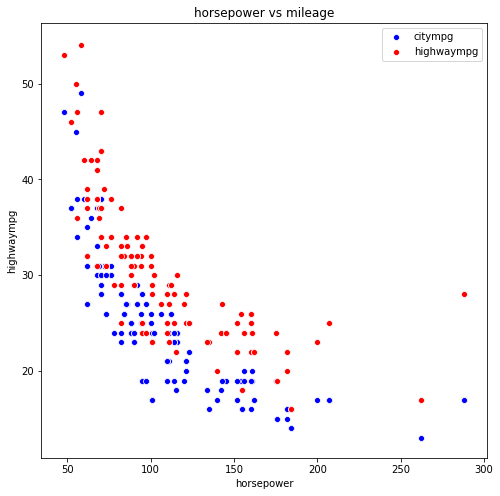

In [44]:
f,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df,x='horsepower',y='citympg',color='blue',label='citympg')
sns.scatterplot(data=df,x='horsepower',y='highwaympg',color='red',label='highwaympg')
plt.title('horsepower vs mileage')
plt.show()





From the graph it is clear that **As the horsepower of the car increases mileage in city as well as on highway decreases**.

**6.Mileage vs price**

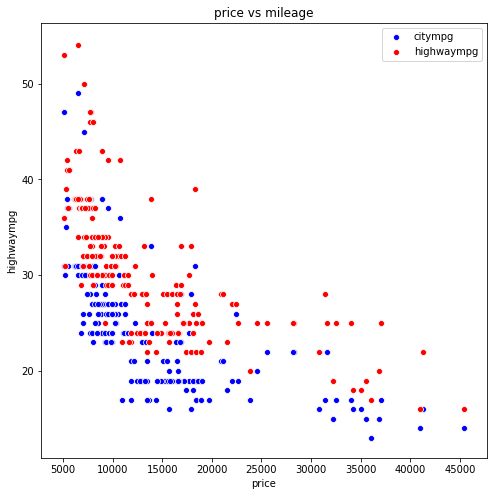

In [45]:
f,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df,x='price',y='citympg',color='blue',label='citympg')
sns.scatterplot(data=df,x='price',y='highwaympg',color='red',label='highwaympg')
plt.title('price vs mileage')
plt.show()


From the graph it is clearly evident that **As Mileage of the car increases the price of the car decreases**.

from the previous graph it is evident that **As the horsepower of the car increases mileage in city as well as on highway decreases**.

And we know that **Flagship car have more horsepower , thus less mileage and greater preice** and **viceversa for budget cars**.

It follows **Neagtive coorelation**.

**7.Enginesize vs price**

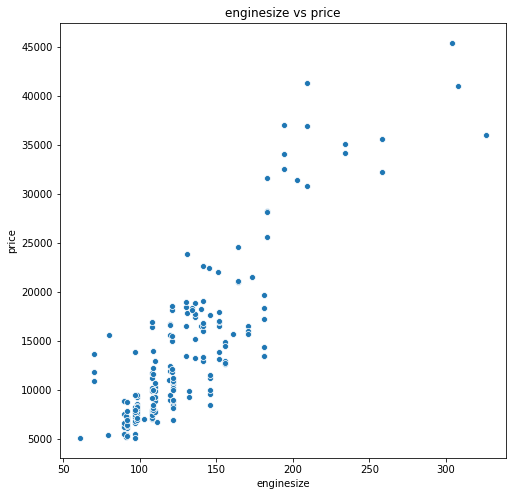

In [46]:
f,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df,x='enginesize',y='price')
plt.title('enginesize vs price')
plt.show()

As we know that , the **enigne is one of the costliest** part of the car which **determine the price** of the car.


Since,**Flagship cars require greater horse power they use big engines and thus the car prices increases , viceversa for budget car**.

It follows **Positive coorelation**.

**8.Curbweight vs price**

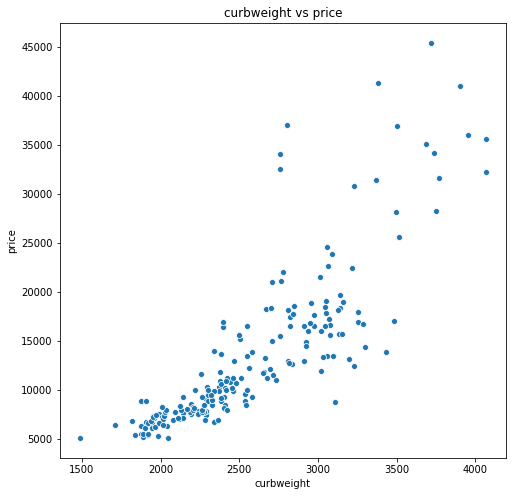

In [47]:
f,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df,x='curbweight',y='price')
plt.title('curbweight vs price')
plt.show()

It is evident that **As the curbweight of the car increases the price of the car also increases**.

It follows **Positive Coorelation**.

**9.Volume of car vs price**

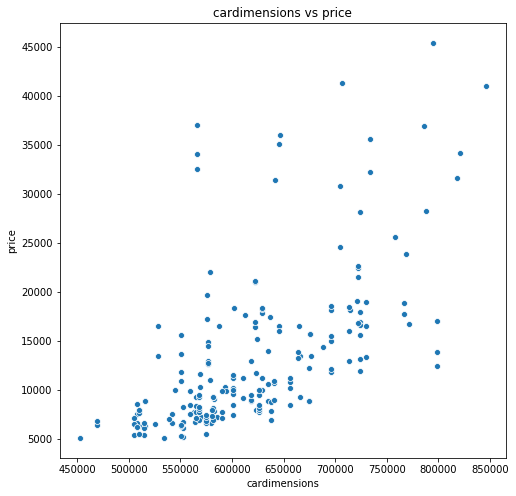

In [48]:
f,ax=plt.subplots(figsize=(8,8))
sns.scatterplot(data=df,x='cardimensions',y='price')
plt.title('cardimensions vs price')
plt.show()

Here we can see some **Upward trend ie; increase in price wrt car volume**.

**10.Price wrt symboling**

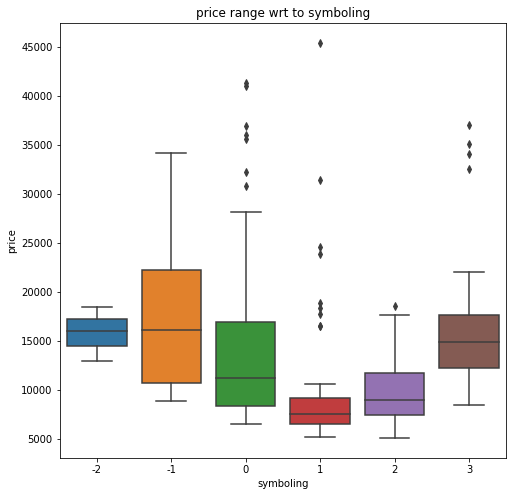

In [49]:
f,ax=plt.subplots(figsize=(8,8))
sns.boxplot(data=df,x='symboling',y='price')
plt.title('price range wrt to symboling')
plt.show()

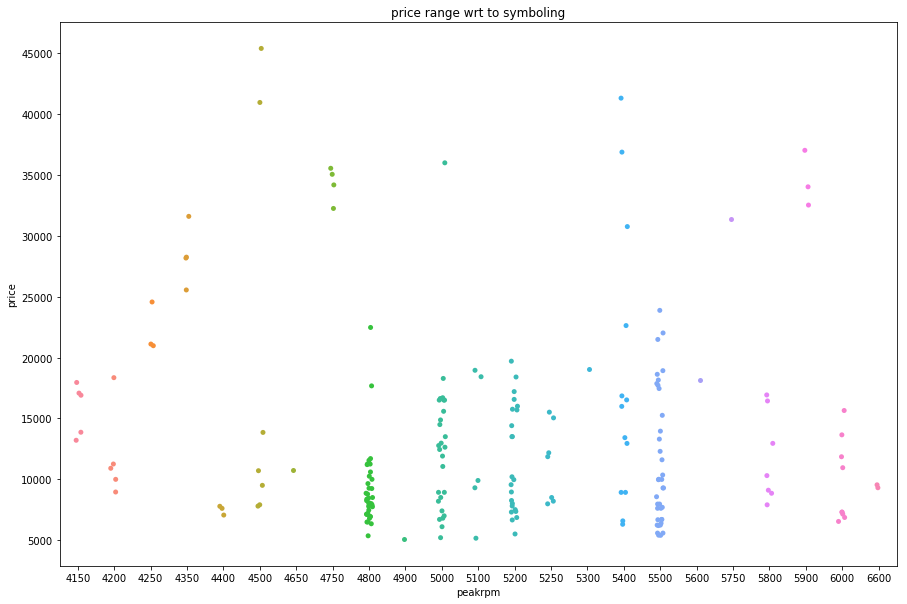

In [184]:
f,ax=plt.subplots(figsize=(15,10))
sns.stripplot(data=df,x='peakrpm',y='price')
plt.title('price range wrt to symboling')
plt.show()

Symboling -Its assigned insurance risk rating +3 risky and -3 safe

**Median price** of the car wrt its symboling:-
    
-2:- approx **16000**$  
        
-1:- approx **16000**$        
        
0:- approx **11000**$    
        
1:- approx **7000**$    
        
2:- approx **10000**$     
        
3:- approx **15000**$    

# Multivariate Analysis

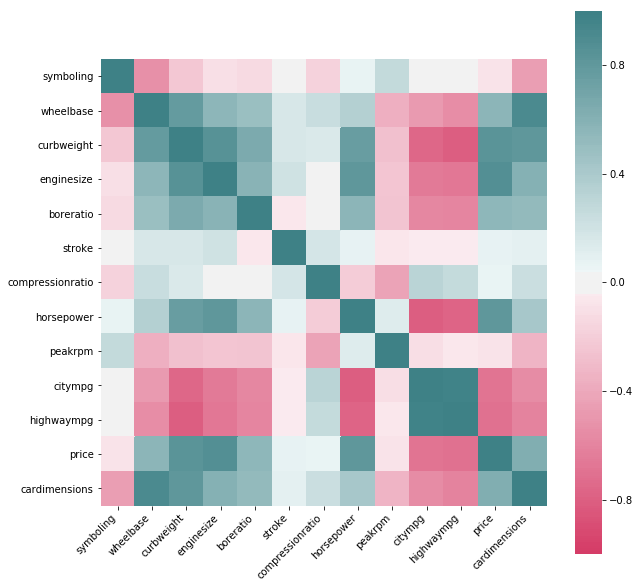

In [406]:
f,ax=plt.subplots(figsize=(10,10)) 
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(1, 200, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

From the given heatmap we can find the degree of correlation between the variables and the price of the car.

Greener the shade :- Positive coorelation
    
Redder the shade :- Negative coorelation
    
Whiter the shade :- No coorelation



Variables having **positive coorelation with price** (Price of the car inceases):-

**Curbweight**

**Enginesize**

**Horsepower**

**Cardimensions**

Variables having **negative coorelation with price** (Price of the car decreases):-
    
**City mileage**

**highway mileage**.

# Conclusion

1.Max no of cars sold are in the price range of **5000-15000**$. 


2.From the price range, we can see that **'America is price sensitive market'**.


3.Americans prefer **Gas** cars over the diesel car.


4.**Toyota** is the largest car company in America followed by 'Nissan, Mazda, Mitsubishi, Honda, Volkswagen, Subaru'.


5.Average mileage for a car in the city is **25**mpg and on the highway is **30**mpg.


6.People in America prefer cars having Horsepower ranging from **50-125** horsepower.


7.Most people in America prefer **Sedan** cars followed by Hatchback.


8.Majority of the company operates in the **budget and mid-range segment**.


9.Variables having a positive correlation with the price (Price of the car increases):-


**Curb weight**

**Engine size**

**Horsepower**

**Car dimensions**

10.Variables having a negative correlation with the price (Price of the car decreases):-


**City mileage**

**highway mileage**

# Linear regression model

Here , we are going to develop a model for the prediction of carprices. 

In [419]:
# Importing the sklearn for linearregression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [409]:
X = df.drop('price', axis=1) # X is our column for independent variables therefore, we drop the price column. since price is our dependent variable
y = df[['price']] # y is dependent variables

In [410]:
# Making train and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                  random_state=1)

In [412]:
# Developing the model
reg = LinearRegression()
reg.fit(X_train[['curbweight','horsepower','enginesize','wheelbase','boreratio']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [413]:
# Predecting the prices
y_predicted = reg.predict(X_test[['curbweight','horsepower','enginesize','wheelbase','boreratio']])

In [414]:
# r2_scores indicates the accuracy level of the model
r2_score(y_test, y_predicted)



0.7875463425133391

In [415]:
# Test sample
y_test

,price
78,6669.0
97,7999.0
151,6338.0
44,8916.5
40,10295.0
67,25552.0
98,8249.0
18,5151.0
152,6488.0
62,10245.0


In [416]:
# output of the model
y_predicted

array([[ 6253.81690689],
       [ 6772.76482271],
       [ 6162.35787047],
       [ 5805.52575179],
       [10064.13244964],
       [23052.67839429],
       [ 6743.28468559],
       [  346.01217025],
       [ 6087.18103805],
       [11170.23456668],
       [15583.77681593],
       [16508.53429508],
       [16562.60461588],
       [ 9814.54536599],
       [18243.72716295],
       [15618.44059919],
       [ 9499.56472333],
       [ 6540.35751368],
       [16178.0413246 ],
       [11222.67432454],
       [11761.77525568],
       [ 5493.42261424],
       [10865.41246015],
       [ 8917.30165416],
       [15233.53521718],
       [ 6588.47068643],
       [18598.93640069],
       [ 6958.23086277],
       [ 5958.93715707],
       [ 7020.2359241 ],
       [ 7276.75158823],
       [12237.34440858],
       [27487.63175563],
       [12587.95086932],
       [17621.78680617],
       [ 6949.20964288],
       [ 9106.74727187],
       [34636.74530533],
       [ 9998.73071579],
       [17084.54598977],


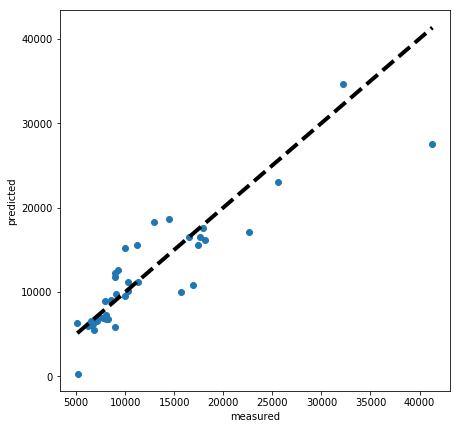

In [422]:
# Scatter plot depecting the linear model(predicted values) vs measured values
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

Since , linear regression is the simplest model therefore its accuracy is low.

Accuracy can be improved using other models.